# Pandas
* Validation
* Filter
* Sort
* Useful Methods
* Groupby
* Merge

In [42]:
import pandas as pd
import pandera as pa
from pandera.typing import Series
from datetime import datetime
class StudentsSchema(pa.SchemaModel):
    Roll_No: Series[int] = pa.Field(ge = 1)
    Student_Name: Series[str] = pa.Field(nullable = False)
    Father_Name: Series[str] = pa.Field(nullable = False)
    Age: Series[int] = pa.Field(ge = 18, le = 40)
    Course: Series[str] = pa.Field(nullable = False)
    Date_of_Admission: Series[datetime] = pa.Field(le = datetime.now())
    Fee: Series[int] = pa.Field(ge = 0)
class Config:
    coerce = True
    strict = True
students_data = [
    {'Roll_No': 1, 'Student_Name': 'John', 'Father_Name': 'Alice', 'Age': 20, 'Course': 'Python', 'Date_of_Admission': '14.06.2023', 'Fee': 6500},
    {'Roll_No': 2, 'Student_Name': 'Jane', 'Father_Name': 'Alanel', 'Age': 18, 'Course': 'C#', 'Date_of_Admission': '12.07.2023', 'Fee': 5000},
    {'Roll_No': 3, 'Student_Name': 'Mary', 'Father_Name': 'Bob', 'Age': 22, 'Course': 'Java', 'Date_of_Admission': '15.02.2023', 'Fee': 6000},
    {'Roll_No': 4, 'Student_Name': 'Peter', 'Father_Name': 'Charlie', 'Age': 19, 'Course': 'C++', 'Date_of_Admission': '11.10.2023', 'Fee': 4500},
    {'Roll_No': 5, 'Student_Name': 'Sam', 'Father_Name': 'David', 'Age': 24, 'Course': 'HTML', 'Date_of_Admission': '24.06.2023', 'Fee': 3000},
    {'Roll_No': 6, 'Student_Name': 'Aliza', 'Father_Name': 'Nasir', 'Age': 26, 'Course': 'CSS', 'Date_of_Admission': '18.09.2023', 'Fee': 4000},
    {'Roll_No': 7, 'Student_Name': 'Samantha', 'Father_Name': 'John', 'Age': 23, 'Course': 'Python', 'Date_of_Admission': '19.05.2023', 'Fee': 6500},
    {'Roll_No': 8, 'Student_Name': 'Sara', 'Father_Name': 'Mark', 'Age': 21, 'Course': 'HTML', 'Date_of_Admission': '10.04.2023', 'Fee': 3000},
    {'Roll_No': 9, 'Student_Name': 'Yash', 'Father_Name': 'Taylor', 'Age': 25, 'Course': 'CSS', 'Date_of_Admission': '05.05.2023', 'Fee': 4000},
    {'Roll_No': 10, 'Student_Name': 'Haider', 'Father_Name': 'Hussain', 'Age': 18, 'Course': 'C#', 'Date_of_Admission': '17.08.2023', 'Fee': 5000}
]
raw_data: pd.DataFrame = pd.DataFrame(students_data)
raw_data['Date_of_Admission'] = pd.to_datetime(raw_data['Date_of_Admission'])
validated_data = StudentsSchema.validate(raw_data)
display(validated_data)
validated_data.dtypes


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12932\3714402037.py:29: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  raw_data['Date_of_Admission'] = pd.to_datetime(raw_data['Date_of_Admission'])


,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
0,1,John,Alice,20,Python,2023-06-14,6500
1,2,Jane,Alanel,18,C#,2023-07-12,5000
2,3,Mary,Bob,22,Java,2023-02-15,6000
3,4,Peter,Charlie,19,C++,2023-10-11,4500
4,5,Sam,David,24,HTML,2023-06-24,3000
5,6,Aliza,Nasir,26,CSS,2023-09-18,4000
6,7,Samantha,John,23,Python,2023-05-19,6500
7,8,Sara,Mark,21,HTML,2023-04-10,3000
8,9,Yash,Taylor,25,CSS,2023-05-05,4000
9,10,Haider,Hussain,18,C#,2023-08-17,5000


Roll_No                       int64
Student_Name                 object
Father_Name                  object
Age                           int64
Course                       object
Date_of_Admission    datetime64[ns]
Fee                           int64
dtype: object

In [44]:
# How to apply Filter
raw_data.Course.value_counts() 

Course
Python    2
C#        2
HTML      2
CSS       2
Java      1
C++       1
Name: count, dtype: int64

In [45]:
# How to apply Filter
raw_data.Course.value_counts(dropna = False) # Also counts empty values

Course
Python    2
C#        2
HTML      2
CSS       2
Java      1
C++       1
Name: count, dtype: int64

In [47]:
# How to apply Filter
raw_data.Course.value_counts(dropna = False, normalize = True) # converts numeric count into percentage

Course
Python    0.2
C#        0.2
HTML      0.2
CSS       0.2
Java      0.1
C++       0.1
Name: proportion, dtype: float64

In [48]:
# How to apply Filter
raw_data.Course.value_counts(dropna = False, normalize = True)*100 # converts numeric count into percentage

Course
Python    20.0
C#        20.0
HTML      20.0
CSS       20.0
Java      10.0
C++       10.0
Name: proportion, dtype: float64

In [87]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
np.random.seed(0)
num_transactions = 1000
current_year = datetime.now().year
start_date = datetime(current_year, 1, 1)
end_date = datetime.now()
random_dates = [start_date + timedelta(days = np.random.randint(0, (end_date - start_date).days))
                for _ in range(num_transactions)]
random_fees = np.random.randint(low = 1000, high = 5000, size = num_transactions)
fee_transactions = pd.DataFrame({'date': random_dates, 'fee': random_fees})
fee_transactions.sort_values(by = 'date', inplace = True)
fee_transactions.reset_index(drop = True, inplace = True)
display(fee_transactions)

,date,fee
0,2023-01-01,4781
1,2023-01-01,3208
2,2023-01-01,4758
3,2023-01-01,4829
4,2023-01-03,2820
...,...,...
995,2023-11-08,4690
996,2023-11-09,1055
997,2023-11-10,1721
998,2023-11-10,2492


In [88]:
# How to apply Filter (It will change all the transactions into certain catagories)
pd.cut(fee_transactions.fee, [1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])

0      (4500, 5000]
1      (3000, 3500]
2      (4500, 5000]
3      (4500, 5000]
4      (2500, 3000]
           ...     
995    (4500, 5000]
996    (1000, 1500]
997    (1500, 2000]
998    (2000, 2500]
999    (2000, 2500]
Name: fee, Length: 1000, dtype: category
Categories (10, interval[int64, right]): [(1, 500] < (500, 1000] < (1000, 1500] < (1500, 2000] ... (3000, 3500] < (3500, 4000] < (4000, 4500] < (4500, 5000]]

In [102]:
# How to apply Filter
pd.cut(fee_transactions.fee, 
    [1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]).value_counts()

fee
(3000, 3500]    142
(2000, 2500]    134
(1000, 1500]    131
(4500, 5000]    125
(2500, 3000]    124
(4000, 4500]    122
(3500, 4000]    120
(1500, 2000]    102
(1, 500]          0
(500, 1000]       0
Name: count, dtype: int64

In [103]:
# How to apply Filter
pd.cut(fee_transactions.fee, 
    [1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]).value_counts(normalize = True)*100

fee
(3000, 3500]    14.2
(2000, 2500]    13.4
(1000, 1500]    13.1
(4500, 5000]    12.5
(2500, 3000]    12.4
(4000, 4500]    12.2
(3500, 4000]    12.0
(1500, 2000]    10.2
(1, 500]         0.0
(500, 1000]      0.0
Name: proportion, dtype: float64

In [106]:
# How to apply Filter (it will give catagories)
pd.qcut(fee_transactions.fee, 
    [0, 0.3, 0.5, 0.7, 0.9, 1])

0        (4612.1, 4996.0]
1        (3022.0, 3783.6]
2        (4612.1, 4996.0]
3        (4612.1, 4996.0]
4        (2243.0, 3022.0]
              ...        
995      (4612.1, 4996.0]
996    (1015.999, 2243.0]
997    (1015.999, 2243.0]
998      (2243.0, 3022.0]
999      (2243.0, 3022.0]
Name: fee, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(1015.999, 2243.0] < (2243.0, 3022.0] < (3022.0, 3783.6] < (3783.6, 4612.1] < (4612.1, 4996.0]]

In [107]:
# How to apply Filter
pd.qcut(fee_transactions.fee, 
    [0, 0.3, 0.5, 0.7, 0.9, 1]).value_counts()

fee
(1015.999, 2243.0]    302
(3022.0, 3783.6]      200
(3783.6, 4612.1]      200
(2243.0, 3022.0]      198
(4612.1, 4996.0]      100
Name: count, dtype: int64

In [108]:
# How to apply Filter
pd.qcut(fee_transactions.fee, 
    [0, 0.3, 0.5, 0.7, 0.9, 1]).value_counts(normalize = True)*100

fee
(1015.999, 2243.0]    30.2
(3022.0, 3783.6]      20.0
(3783.6, 4612.1]      20.0
(2243.0, 3022.0]      19.8
(4612.1, 4996.0]      10.0
Name: proportion, dtype: float64

In [112]:
raw_data['Course'] == "Python"

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: Course, dtype: bool

In [116]:
raw_data[raw_data['Course'] == "Python"]

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
0,1,John,Alice,20,Python,2023-06-14,6500
6,7,Samantha,John,23,Python,2023-05-19,6500


In [117]:
raw_data['Course'].str.lower()

0    python
1        c#
2      java
3       c++
4      html
5       css
6    python
7      html
8       css
9        c#
Name: Course, dtype: object

In [119]:
raw_data['Course'].str.lower() == 'python'

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: Course, dtype: bool

In [120]:
raw_data[raw_data['Course'].str.lower() == 'python']

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
0,1,John,Alice,20,Python,2023-06-14,6500
6,7,Samantha,John,23,Python,2023-05-19,6500


In [121]:
raw_data['Course'].str.lower().str.contains('tm')

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7     True
8    False
9    False
Name: Course, dtype: bool

In [124]:
raw_data[raw_data['Course'].str.lower().str.contains('tm')]

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
4,5,Sam,David,24,HTML,2023-06-24,3000
7,8,Sara,Mark,21,HTML,2023-04-10,3000


In [125]:
raw_data[raw_data['Course'].str.lower().str.contains('tm') | raw_data['Course'].str.lower().str.contains('th')]

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
0,1,John,Alice,20,Python,2023-06-14,6500
4,5,Sam,David,24,HTML,2023-06-24,3000
6,7,Samantha,John,23,Python,2023-05-19,6500
7,8,Sara,Mark,21,HTML,2023-04-10,3000


In [126]:
# How to apply a filter on integers
raw_data[raw_data['Fee'] >= 4500]

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
0,1,John,Alice,20,Python,2023-06-14,6500
1,2,Jane,Alanel,18,C#,2023-07-12,5000
2,3,Mary,Bob,22,Java,2023-02-15,6000
3,4,Peter,Charlie,19,C++,2023-10-11,4500
6,7,Samantha,John,23,Python,2023-05-19,6500
9,10,Haider,Hussain,18,C#,2023-08-17,5000


In [131]:
# How to apply a filter to the date
raw_data[raw_data['Date_of_Admission'].dt.month == 6]

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
0,1,John,Alice,20,Python,2023-06-14,6500
4,5,Sam,David,24,HTML,2023-06-24,3000


## Formates of date
* dt.strftime('%Y-%m-%d %H:%M:%S')
* dt.strptime('%Y-%m-%d %H:%M:%S', '%Y-%m-%d)

In [133]:
from datetime import datetime
date: datetime = datetime.now()
display(date)

datetime.datetime(2023, 11, 11, 20, 9, 12, 717855)

In [135]:
s1: pd.Series = pd.Series([date])
s1

0   2023-11-11 20:09:12.717855
dtype: datetime64[ns]

In [137]:
# How to convert datetime to string
s1.dt.strftime('%Y/%m/%d')

0    2023/11/11
dtype: object

In [139]:
# How to convert datetime to string
s1.dt.strftime('%dth %B, %Y')

0    11th November, 2023
dtype: object

In [155]:
s2: pd.Series = pd.Series(['01 Nov 2022', '15 Jun 2023'])
s2

0    01 Nov 2022
1    15 Jun 2023
dtype: object

In [158]:
# How to convert string to datetime
s2.apply(lambda x: datetime.strptime(x, '%d %b %Y'))

0   2022-11-01
1   2023-06-15
dtype: datetime64[ns]

## Groupby

In [163]:
list(raw_data.groupby(['Course']))

[(('C#',),
     Roll_No Student_Name Father_Name  Age Course Date_of_Admission   Fee
  1        2         Jane      Alanel   18     C#        2023-07-12  5000
  9       10       Haider     Hussain   18     C#        2023-08-17  5000),
 (('C++',),
     Roll_No Student_Name Father_Name  Age Course Date_of_Admission   Fee
  3        4        Peter     Charlie   19    C++        2023-10-11  4500),
 (('CSS',),
     Roll_No Student_Name Father_Name  Age Course Date_of_Admission   Fee
  5        6        Aliza       Nasir   26    CSS        2023-09-18  4000
  8        9         Yash      Taylor   25    CSS        2023-05-05  4000),
 (('HTML',),
     Roll_No Student_Name Father_Name  Age Course Date_of_Admission   Fee
  4        5          Sam       David   24   HTML        2023-06-24  3000
  7        8         Sara        Mark   21   HTML        2023-04-10  3000),
 (('Java',),
     Roll_No Student_Name Father_Name  Age Course Date_of_Admission   Fee
  2        3         Mary         Bob   22 

In [165]:
list(raw_data.groupby(['Course']))[0]

(('C#',),
    Roll_No Student_Name Father_Name  Age Course Date_of_Admission   Fee
 1        2         Jane      Alanel   18     C#        2023-07-12  5000
 9       10       Haider     Hussain   18     C#        2023-08-17  5000)

In [166]:
for group in list(raw_data.groupby(['Course'])):
    display(group[0])
    display(group[1])
    print("======================================================")

('C#',)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
1,2,Jane,Alanel,18,C#,2023-07-12,5000
9,10,Haider,Hussain,18,C#,2023-08-17,5000


('C++',)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
3,4,Peter,Charlie,19,C++,2023-10-11,4500


('CSS',)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
5,6,Aliza,Nasir,26,CSS,2023-09-18,4000
8,9,Yash,Taylor,25,CSS,2023-05-05,4000


('HTML',)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
4,5,Sam,David,24,HTML,2023-06-24,3000
7,8,Sara,Mark,21,HTML,2023-04-10,3000


('Java',)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
2,3,Mary,Bob,22,Java,2023-02-15,6000


('Python',)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
0,1,John,Alice,20,Python,2023-06-14,6500
6,7,Samantha,John,23,Python,2023-05-19,6500


In [167]:
for group in list(raw_data.groupby(['Fee'])):
    display(group[0])
    display(group[1])
    print("======================================================")

(3000,)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
4,5,Sam,David,24,HTML,2023-06-24,3000
7,8,Sara,Mark,21,HTML,2023-04-10,3000


(4000,)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
5,6,Aliza,Nasir,26,CSS,2023-09-18,4000
8,9,Yash,Taylor,25,CSS,2023-05-05,4000


(4500,)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
3,4,Peter,Charlie,19,C++,2023-10-11,4500


(5000,)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
1,2,Jane,Alanel,18,C#,2023-07-12,5000
9,10,Haider,Hussain,18,C#,2023-08-17,5000


(6000,)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
2,3,Mary,Bob,22,Java,2023-02-15,6000


(6500,)

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
0,1,John,Alice,20,Python,2023-06-14,6500
6,7,Samantha,John,23,Python,2023-05-19,6500


In [173]:
for group in list(raw_data.groupby(raw_data['Date_of_Admission'].dt.strftime('%Y'))):
    display(group[0])
    display(group[1])
    print("======================================================")

'2023'

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
0,1,John,Alice,20,Python,2023-06-14,6500
1,2,Jane,Alanel,18,C#,2023-07-12,5000
2,3,Mary,Bob,22,Java,2023-02-15,6000
3,4,Peter,Charlie,19,C++,2023-10-11,4500
4,5,Sam,David,24,HTML,2023-06-24,3000
5,6,Aliza,Nasir,26,CSS,2023-09-18,4000
6,7,Samantha,John,23,Python,2023-05-19,6500
7,8,Sara,Mark,21,HTML,2023-04-10,3000
8,9,Yash,Taylor,25,CSS,2023-05-05,4000
9,10,Haider,Hussain,18,C#,2023-08-17,5000


In [181]:
for group in list(raw_data.groupby([raw_data['Date_of_Admission'].dt.strftime('%Y'), raw_data['Course']])):
    display(group[0])
    display(group[1])
    print("======================================================")

('2023', 'C#')

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
1,2,Jane,Alanel,18,C#,2023-07-12,5000
9,10,Haider,Hussain,18,C#,2023-08-17,5000


('2023', 'C++')

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
3,4,Peter,Charlie,19,C++,2023-10-11,4500


('2023', 'CSS')

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
5,6,Aliza,Nasir,26,CSS,2023-09-18,4000
8,9,Yash,Taylor,25,CSS,2023-05-05,4000


('2023', 'HTML')

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
4,5,Sam,David,24,HTML,2023-06-24,3000
7,8,Sara,Mark,21,HTML,2023-04-10,3000


('2023', 'Java')

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
2,3,Mary,Bob,22,Java,2023-02-15,6000


('2023', 'Python')

,Roll_No,Student_Name,Father_Name,Age,Course,Date_of_Admission,Fee
0,1,John,Alice,20,Python,2023-06-14,6500
6,7,Samantha,John,23,Python,2023-05-19,6500


In [184]:
raw_data.groupby(['Course'])['Fee'].aggregate('count')

Course
C#        2
C++       1
CSS       2
HTML      2
Java      1
Python    2
Name: Fee, dtype: int64

In [194]:
raw_data.groupby(['Course'])['Fee'].agg(['min', 'max', 'mean', 'count'])

,min,max,mean,count
Course,,,,
C#,5000,5000,5000.0,2
C++,4500,4500,4500.0,1
CSS,4000,4000,4000.0,2
HTML,3000,3000,3000.0,2
Java,6000,6000,6000.0,1
Python,6500,6500,6500.0,2


In [199]:
raw_data.groupby(['Course', raw_data['Date_of_Admission'].dt.strftime('%m')])['Fee'].agg(['min', 'max', 'mean', 'count', len])

min   max    mean  count  len
Course Date_of_Admission                                
C#     07                 5000  5000  5000.0      1    1
       08                 5000  5000  5000.0      1    1
C++    10                 4500  4500  4500.0      1    1
CSS    05                 4000  4000  4000.0      1    1
       09                 4000  4000  4000.0      1    1
HTML   04                 3000  3000  3000.0      1    1
       06                 3000  3000  3000.0      1    1
Java   02                 6000  6000  6000.0      1    1
Python 05                 6500  6500  6500.0      1    1
       06                 6500  6500  6500.0      1    1

In [200]:
raw_data.groupby(['Course'])['Fee'].apply(lambda x: x.value_counts())

Course      
C#      5000    2
C++     4500    1
CSS     4000    2
HTML    3000    2
Java    6000    1
Python  6500    2
Name: Fee, dtype: int64

## Data Visualization

<Axes: xlabel='Course'>

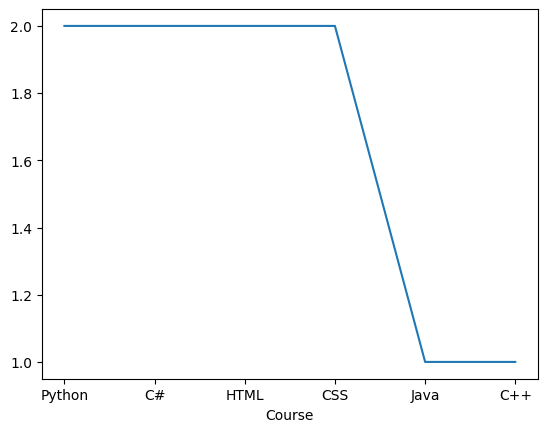

In [202]:
raw_data['Course'].value_counts().plot()

<Axes: xlabel='Course'>

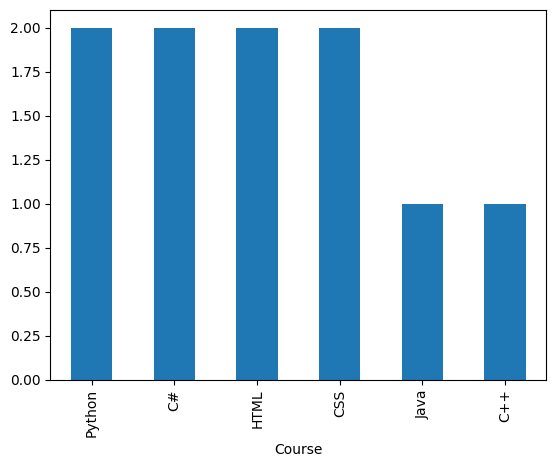

In [203]:
raw_data['Course'].value_counts().plot(kind = 'bar')

<Axes: ylabel='proportion'>

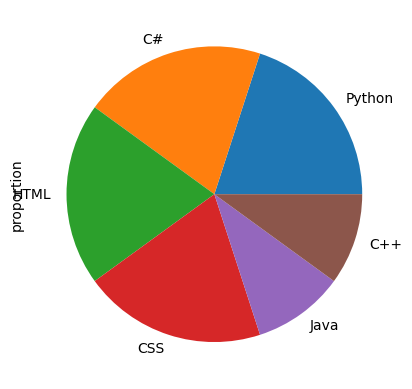

In [204]:
raw_data['Course'].value_counts(normalize = True).plot(kind = 'pie')

<Axes: xlabel='Course'>

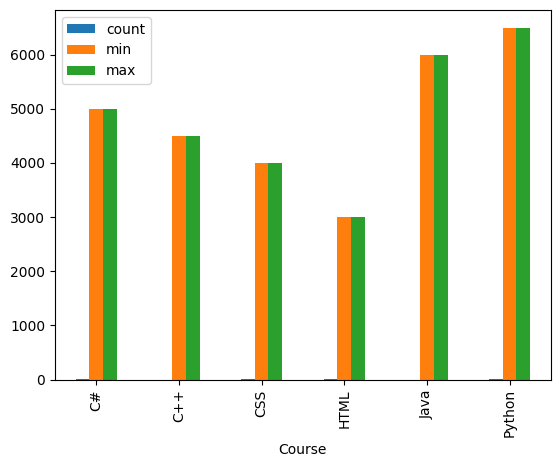

In [207]:
raw_data.groupby(['Course'])['Fee'].aggregate(['count', 'min', 'max']).plot(kind = 'bar')

## Merging
    * .merge()
        * on
        * left_on
        * right_on
        * left_index # True by default
        * right_index # True by default
        * suffixes
        * how
            * left
            * right
            * inner
            * outer
            * cross
    * .join()
        *.joinRight()
        *.joinLeft()
    * .concat()
    * .append()
    * .add()
        * .addRight()
        * .addLeft()
    * .union()
        * .unionRight()
        * .unionLeft()
        * .unionAll()

In [228]:
from typing import Dict, List, Union
students_data: dict[str, list[Union[str, int]]] = {
    'student_id': ['1', '2', '3', '4', '5'], 
    'name': ['Alice', 'Bob', 'Charlie', 'Daniel', 'Eve'],
    'teacher_id': [101, 102, 103, 101, 102]
    }
students: pd.DataFrame = pd.DataFrame(students_data)
teachers_data: dict[str, list[Union[str, int]]] = {
    'teacher_id':[101, 102, 103], 
    'course_name': ['Math', 'Science', 'English'],
    'teachers_name': ['Mr. Smith', 'Mr. Johnson', 'Dr. Lee']
    }
teachers: pd.DataFrame = pd.DataFrame(teachers_data)
student_fees_data: dict[str, list[Union[str, float]]] = {
    'student_id': ['1', '2', '3', '4', '5'], 
    'fee_paid': [500, 1000, 1500, 2000, 2500]
    }
student_fees: pd.DataFrame = pd.DataFrame(student_fees_data)

In [229]:
students

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,Daniel,101
4,5,Eve,102


In [230]:
teachers

,teacher_id,course_name,teachers_name
0,101,Math,Mr. Smith
1,102,Science,Mr. Johnson
2,103,English,Dr. Lee


In [231]:
student_fees

,student_id,fee_paid
0,1,500
1,2,1000
2,3,1500
3,4,2000
4,5,2500


## When Series' name, pathren and data types are same

In [233]:
df1: pd.DataFrame = pd.merge(students, teachers, on='teacher_id', how='inner')
df1

,student_id,name,teacher_id,course_name,teachers_name
0,1,Alice,101,Math,Mr. Smith
1,4,Daniel,101,Math,Mr. Smith
2,2,Bob,102,Science,Mr. Johnson
3,5,Eve,102,Science,Mr. Johnson
4,3,Charlie,103,English,Dr. Lee


In [234]:
df2: pd.DataFrame = pd.merge(students, student_fees, on = 'student_id', how = 'inner')
df2

,student_id,name,teacher_id,fee_paid
0,1,Alice,101,500
1,2,Bob,102,1000
2,3,Charlie,103,1500
3,4,Daniel,101,2000
4,5,Eve,102,2500


In [246]:
df3: pd.DataFrame = pd.merge(df1, student_fees, on = 'student_id', how = 'left')
df3

,student_id,name,teacher_id,course_name,teachers_name,fee_paid
0,1,Alice,101,Math,Mr. Smith,500
1,4,Daniel,101,Math,Mr. Smith,2000
2,2,Bob,102,Science,Mr. Johnson,1000
3,5,Eve,102,Science,Mr. Johnson,2500
4,3,Charlie,103,English,Dr. Lee,1500


In [247]:
from typing import Dict, List, Union
students_data: dict[str, list[Union[str, int]]] = {
    'student_id': ['1', '2', '3', '4', '5'], 
    'name': ['Alice', 'Bob', 'Charlie', 'Daniel', 'Eve'],
    'teacher_id': [101, 102, 103, 100, 102]
    }
students: pd.DataFrame = pd.DataFrame(students_data)
teachers_data: dict[str, list[Union[str, int]]] = {
    'teacher_id':[101, 102, 104], 
    'course_name': ['Math', 'Science', 'English'],
    'teachers_name': ['Mr. Smith', 'Mr. Johnson', 'Dr. Lee']
    }
teachers: pd.DataFrame = pd.DataFrame(teachers_data)
student_fees_data: dict[str, list[Union[str, float]]] = {
    'student_id': ['1', '2', '3', '4', '5'], 
    'fee_paid': [500, 1000, 1500, 2000, 2500]
    }
student_fees: pd.DataFrame = pd.DataFrame(student_fees_data)

In [249]:
students

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,Daniel,100
4,5,Eve,102


In [250]:
teachers

,teacher_id,course_name,teachers_name
0,101,Math,Mr. Smith
1,102,Science,Mr. Johnson
2,104,English,Dr. Lee


In [251]:
student_fees

,student_id,fee_paid
0,1,500
1,2,1000
2,3,1500
3,4,2000
4,5,2500


In [252]:
df11: pd.DataFrame = pd.merge(students, teachers, how='inner', on='teacher_id')
df11

,student_id,name,teacher_id,course_name,teachers_name
0,1,Alice,101,Math,Mr. Smith
1,2,Bob,102,Science,Mr. Johnson
2,5,Eve,102,Science,Mr. Johnson


In [253]:
df11: pd.DataFrame = pd.merge(students, teachers, how='left', on='teacher_id')
df11

,student_id,name,teacher_id,course_name,teachers_name
0,1,Alice,101,Math,Mr. Smith
1,2,Bob,102,Science,Mr. Johnson
2,3,Charlie,103,NaN,NaN
3,4,Daniel,100,NaN,NaN
4,5,Eve,102,Science,Mr. Johnson


In [254]:
df11: pd.DataFrame = pd.merge(students, teachers, how='right', on='teacher_id')
df11

,student_id,name,teacher_id,course_name,teachers_name
0,1,Alice,101,Math,Mr. Smith
1,2,Bob,102,Science,Mr. Johnson
2,5,Eve,102,Science,Mr. Johnson
3,NaN,NaN,104,English,Dr. Lee


In [255]:
df11: pd.DataFrame = pd.merge(students, teachers, how='outer', on='teacher_id')
df11

,student_id,name,teacher_id,course_name,teachers_name
0,1,Alice,101,Math,Mr. Smith
1,2,Bob,102,Science,Mr. Johnson
2,5,Eve,102,Science,Mr. Johnson
3,3,Charlie,103,NaN,NaN
4,4,Daniel,100,NaN,NaN
5,NaN,NaN,104,English,Dr. Lee


In [257]:
df11: pd.DataFrame = pd.merge(students, teachers, how='cross')
df11

,student_id,name,teacher_id_x,teacher_id_y,course_name,teachers_name
0,1,Alice,101,101,Math,Mr. Smith
1,1,Alice,101,102,Science,Mr. Johnson
2,1,Alice,101,104,English,Dr. Lee
3,2,Bob,102,101,Math,Mr. Smith
4,2,Bob,102,102,Science,Mr. Johnson
5,2,Bob,102,104,English,Dr. Lee
6,3,Charlie,103,101,Math,Mr. Smith
7,3,Charlie,103,102,Science,Mr. Johnson
8,3,Charlie,103,104,English,Dr. Lee
9,4,Daniel,100,101,Math,Mr. Smith


## When Series' names are different but pathren and data types are same

In [258]:
from typing import Dict, List, Union
students_data: dict[str, list[Union[str, int]]] = {
    'student_id': ['1', '2', '3', '4', '5'], 
    'name': ['Alice', 'Bob', 'Charlie', 'Daniel', 'Eve'],
    'teacher_id': [101, 102, 103, 100, 102]
    }
students: pd.DataFrame = pd.DataFrame(students_data)
teachers_data: dict[str, list[Union[str, int]]] = {
    'course_id':[101, 102, 104], 
    'course_name': ['Math', 'Science', 'English'],
    'teachers_name': ['Mr. Smith', 'Mr. Johnson', 'Dr. Lee']
    }
teachers: pd.DataFrame = pd.DataFrame(teachers_data)
student_fees_data: dict[str, list[Union[str, float]]] = {
    'student_id': ['1', '2', '3', '4', '5'], 
    'fee_paid': [500, 1000, 1500, 2000, 2500]
    }
student_fees: pd.DataFrame = pd.DataFrame(student_fees_data)

In [259]:
students

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,Daniel,100
4,5,Eve,102


In [260]:
teachers

,course_id,course_name,teachers_name
0,101,Math,Mr. Smith
1,102,Science,Mr. Johnson
2,104,English,Dr. Lee


In [261]:
student_fees

,student_id,fee_paid
0,1,500
1,2,1000
2,3,1500
3,4,2000
4,5,2500


In [263]:
df111: pd.DataFrame = pd.merge(students, teachers, 
    how = 'inner', left_on ='teacher_id', right_on = 'course_id')
df111

,student_id,name,teacher_id,course_id,course_name,teachers_name
0,1,Alice,101,101,Math,Mr. Smith
1,2,Bob,102,102,Science,Mr. Johnson
2,5,Eve,102,102,Science,Mr. Johnson


In [264]:
df111: pd.DataFrame = pd.merge(students, teachers, 
    how = 'left', left_on ='teacher_id', right_on = 'course_id')
df111

,student_id,name,teacher_id,course_id,course_name,teachers_name
0,1,Alice,101,101.0,Math,Mr. Smith
1,2,Bob,102,102.0,Science,Mr. Johnson
2,3,Charlie,103,NaN,NaN,NaN
3,4,Daniel,100,NaN,NaN,NaN
4,5,Eve,102,102.0,Science,Mr. Johnson


In [265]:
df111: pd.DataFrame = pd.merge(students, teachers, 
    how = 'right', left_on ='teacher_id', right_on = 'course_id')
df111

,student_id,name,teacher_id,course_id,course_name,teachers_name
0,1,Alice,101.0,101,Math,Mr. Smith
1,2,Bob,102.0,102,Science,Mr. Johnson
2,5,Eve,102.0,102,Science,Mr. Johnson
3,NaN,NaN,NaN,104,English,Dr. Lee


In [266]:
df111: pd.DataFrame = pd.merge(students, teachers, 
    how = 'outer', left_on ='teacher_id', right_on = 'course_id')
df111

,student_id,name,teacher_id,course_id,course_name,teachers_name
0,1,Alice,101.0,101.0,Math,Mr. Smith
1,2,Bob,102.0,102.0,Science,Mr. Johnson
2,5,Eve,102.0,102.0,Science,Mr. Johnson
3,3,Charlie,103.0,NaN,NaN,NaN
4,4,Daniel,100.0,NaN,NaN,NaN
5,NaN,NaN,NaN,104.0,English,Dr. Lee


In [268]:
from typing import Dict, List, Union
students_data: dict[str, list[Union[str, int]]] = {
    'student_id': ['1', '2', '3', '4', '5'], 
    'name': ['Alice', 'Bob', 'Charlie', 'Daniel', 'Eve'],
    'teacher_id': [101, 102, 103, 100, 102]
    }
students: pd.DataFrame = pd.DataFrame(students_data)
teachers_data: dict[str, list[Union[str, int]]] = {
    'course_id':[101, 102, 104], 
    'course_name': ['Math', 'Science', 'English'],
    'teachers_name': ['Mr. Smith', 'Mr. Johnson', 'Dr. Lee']
    }
teachers: pd.DataFrame = pd.DataFrame(teachers_data)
student_fees_data: dict[str, list[Union[str, float]]] = {
    'student_id': ['1', '2', '2', '1', '5'], 
    'fee_paid': [500, 1000, 1500, 2000, 2500]
    }
student_fees: pd.DataFrame = pd.DataFrame(student_fees_data)

In [269]:
student_fees

,student_id,fee_paid
0,1,500
1,2,1000
2,2,1500
3,1,2000
4,5,2500


In [279]:
df: pd.DataFrame = student_fees.groupby('student_id').agg('sum')
df

,fee_paid
student_id,
1,2500
2,2500
5,2500


In [287]:
df123: pd.DataFrame = pd.merge(students, df,
    left_on = 'student_id', right_index = True, how = 'left')
df123

,student_id,name,teacher_id,fee_paid
0,1,Alice,101,2500.0
1,2,Bob,102,2500.0
2,3,Charlie,103,NaN
3,4,Daniel,100,NaN
4,5,Eve,102,2500.0


In [296]:
from typing import Dict, List, Union
students_data: dict[str, list[Union[str, int]]] = {
    'student_id': ['1', '2', '3', '4', '5'], 
    'name': ['Alice', 'Bob', 'Charlie', 'Daniel', 'Eve'],
    'teacher_id': [101, 102, 103, 101, 102]
    }
students: pd.DataFrame = pd.DataFrame(students_data)
teachers_data: dict[str, list[Union[str, int]]] = {
    'teacher_id':[101, 102, 103], 
    'course_name': ['Math', 'Science', 'English'],
    'teachers_name': ['Mr. Smith', 'Mr. Johnson', 'Dr. Lee']
    }
teachers: pd.DataFrame = pd.DataFrame(teachers_data)
student_fees_data: dict[str, list[Union[str, float]]] = {
    'student_id': ['1', '2', '3', '4', '5'], 
    'fee_paid': [500, 1000, 1500, 2000, 2500]
    }
student_fees: pd.DataFrame = pd.DataFrame(student_fees_data)

In [298]:
pd.concat([students, teachers, student_fees]) # axis = 0 (default)

,student_id,name,teacher_id,course_name,teachers_name,fee_paid
0,1,Alice,101.0,NaN,NaN,NaN
1,2,Bob,102.0,NaN,NaN,NaN
2,3,Charlie,103.0,NaN,NaN,NaN
3,4,Daniel,101.0,NaN,NaN,NaN
4,5,Eve,102.0,NaN,NaN,NaN
0,NaN,NaN,101.0,Math,Mr. Smith,NaN
1,NaN,NaN,102.0,Science,Mr. Johnson,NaN
2,NaN,NaN,103.0,English,Dr. Lee,NaN
0,1,NaN,NaN,NaN,NaN,500.0
1,2,NaN,NaN,NaN,NaN,1000.0


In [301]:
pd.concat([students, teachers, student_fees], axis = 1)

,student_id,name,teacher_id,teacher_id,course_name,teachers_name,student_id,fee_paid
0,1,Alice,101,101.0,Math,Mr. Smith,1,500
1,2,Bob,102,102.0,Science,Mr. Johnson,2,1000
2,3,Charlie,103,103.0,English,Dr. Lee,3,1500
3,4,Daniel,101,NaN,NaN,NaN,4,2000
4,5,Eve,102,NaN,NaN,NaN,5,2500
